<a href="https://colab.research.google.com/github/BurleighCharlton/Python-Mathematics/blob/main/3n%2B1_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Exploration: The 3n + 1 conjecture

###By Burleigh Charlton, Ian Wallace,  Perry Winsor, Louis Wooliever, and Chun Zhou

# Introduction

In [ ]:
def collatz_sequence(initial_value, iterations):
  '''
  takes a number of iterations 'iterations'
  and an intial value to start at 'initial_value'

  computes a the collats sequence via the formula
  3(initial_value)+1
  collatz_sequence: num, num -> list
  '''
  current_value = int(initial_value)
  sequence_list = [initial_value]
  for i in range(iterations):
    if current_value & 1 == 0: #fast way to check if even
      current_value = int(current_value/2)#divide by 2
      sequence_list.append(current_value)
    else:
      current_value = int((3 * current_value) + 1) #3n+1
      sequence_list.append(current_value)
  return sequence_list


print(*collatz_sequence(5, 10))



    

5 16 49 148 445 1336 4009 12028 36085 108256 324769


In [ ]:
def collatz(n):
    step_counter = 0
    step = n
    if (n <= 1) or (type(n) != int):
        raise ValueError('The Collatz conjecture applies only to integers greater than 1.')
    while step != 1:
        if step%2==0:
            step = step//2
        else:
            step = 3*step + 1
        step_counter += 1
        print('Step {} is {}'.format(step_counter,step))
    return None

In [ ]:
def seq(n):
  '''
  Creates a values list for all values of n while running the sequence.
  '''
  initial_value = n # store inital value
  values = [] # create list for storing squence values
  m = 'dummy' # creating a holder variable m
  while m not in values:
    values.append(n)
    if n % 2 == 0: # run conjecture
      n = int(n/2)
    else:
      n = 3*n+1
    m = n # set m to n for later purpose
  values.remove(initial_value)
  return((initial_value,values))


In [ ]:
def collatz(n):
  '''
  The 3n+1 conjecture. When given a positive integer n, will return the
  Collatz sequence for the starting value terminating once the sequence hits 1
  '''
  sequence = [] #empty list for storing values
  while (n != 1): #checks that n is not already at 1
      sequence.append(n)
      if (n%2 == 0):
          n = int(n/2)
      else:
          n = int(3*n+1)
  return(sequence)
print(collatz(174280))


[174280, 87140, 43570, 21785, 65356, 32678, 16339, 49018, 24509, 73528, 36764, 18382, 9191, 27574, 13787, 41362, 20681, 62044, 31022, 15511, 46534, 23267, 69802, 34901, 104704, 52352, 26176, 13088, 6544, 3272, 1636, 818, 409, 1228, 614, 307, 922, 461, 1384, 692, 346, 173, 520, 260, 130, 65, 196, 98, 49, 148, 74, 37, 112, 56, 28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2]


In [ ]:
def collatz_sequence_faster(initial_value):
  '''
  and an intial value to start at 'initial_value'

  computes a the collats sequence via the formula
  3(initial_value)+1
  breaks when the sequence 4,2,1 is reached
  collatz_sequence: num -> num
  '''

  value_1 = int(initial_value) #current iteration
  value_2 = 0 #second back
  value_3 = 0 #third back
  iterations = 0
  while (value_3, value_2, value_1) != (4,2,1):
    iterations += 1
    if value_1 & 1 == 0: #fast way to check if even
      value_3 = value_2  #move value 2 to value 3
      value_2 = value_1  #move value 1 to value 2
      value_1 = int(value_1/2)#divide by 2 and update value 1
    else:
      value_3 = value_2  #move value 2 to value 3
      value_2 = value_1  #move value 1 to value 2
      value_1 = int((3 * value_1) + 1) #3n+1 and update value 1
  return (iterations)


%timeit(collatz_sequence_faster(3452345))



    

10000 loops, best of 3: 28.8 µs per loop


#Perry Winsor's humble 

In [ ]:
#Perry Winsor
def sequick(n):
  '''
  Take 2
  '''
  while n != 4:
    if n % 2 == 0:
      n /= 2
    else:
      n = 3*n+1
  return True

In [ ]:
%timeit(sequick(1000000))

The slowest run took 9.24 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 26.7 µs per loop


In [ ]:
def check(m):
  '''
  Rough, brute-force check.
  Likely to be effective for small numbers but slow at large m.
  '''
  for n in range (1,m+1):
    if sequick(n) == True:
      None
    else:
      return False
  return True

In [ ]:
%timeit(check(10000))

10 loops, best of 3: 163 ms per loop


In [ ]:
%timeit(check(100000))

1 loop, best of 3: 2.12 s per loop


It won't run for n = 1000000.

In case anyone is ever cuirous about the sequence for any number, which I have been mutiple times, here is this little code I wrote. I'm pretty sure there's one of these up higher, but I've used this in a few of my experiments so if I chose to add those later I want to have this here.

In [ ]:
def seqlist(n):
  '''
  Creates a list of the sequence.
  int(n) -> list(values)
  '''
  initial_value = n # store inital value
  values = [] # create list for storing squence values
  m = 'dummy' # creating a holder variable m
  while m not in values:
    values.append(n)
    if n % 2 == 0: # run conjecture
      n = int(n/2)
    else:
      n = 3*n+1
    m = n # set m to n for later purpose
  values.remove(initial_value)
  return values

The following is my crack at the check all one, since my last one was more of a proof of non-concept for the brute force apporach.

In [ ]:
def checklist(n):
  '''
  Perry's checklist code.
  Constructs a list and checks it twice.
  Well it checks it a few more than twice but you get the idea.
  Fails to find out who is naughty xor nice.
  '''

  checklist = [False]*n             #Construct a checklist
  checklist[0] = True               #Set 1 to True 
                                    ##4 the reason that we know all 2 well what happens if we use 1 
 
  for x in range(2,n+1):            #Itterate over x

    m = x                           #Set dummy value m to x

    while checklist[m-1] == False:  #Check if m's checklist value is false. 
      checklist[m-1] = True         #if it is, set m to True,
      if m % 2 == 0:                #then run the sequence.
        m = m//2                    
      else:                         
        m = 3*m+1
                                    #In order to avoid checking outside of list range,
      while m > n:                  #check if m is outside our range,
        if m % 2 == 0:              #then run the sequence.
          m = m//2                  
        else:                      
          m = 3*m+1    

      if x == m:                    #Check if the sequence stablized before hitting 1
        return x     

  return checklist

We know that if any of the checked values are hit, the sequence will stablize, since the checked values will stablize.

In [ ]:
%timeit(checklist(1000000))

1 loop, best of 3: 545 ms per loop


Works to $10^6$ in about half a second.

In [ ]:
%timeit(checklist(10000000))

1 loop, best of 3: 5.44 s per loop


Took 5.44 seconds for $10^7$ so I'm not gonna check any higher.

Below I wrote a quick little code to check a list to see if checklist checked all the checks in the checklist.

In [ ]:
def checkthechecklistlist(n):
  if type(n) != list:
    raise TypeError('This checklist check-lister only checks list, preferably checklists.')
  for x in n:
    if n == False:
      return False
  return True

In [ ]:
checkthechecklistlist(checklist(10000000))

True

It would appear it did check.

And finally the debugging version which add a few too many print statements for the purpose of running something a couple million times.

In [ ]:
def checklistdebug(n):
  '''
Debug version of checklist(n).
  '''

  checklist = [False]*n             #Construct a checklist
  checklist[0] = True
 
  for x in range(2,n+1):            #Itterate over x

    print('Checking {}...{} is {}'.format(x,x,checklist[x-1]))
    m = x                           #Set dummy value m to x

    while checklist[m-1] == False:  #Check if m's checklist value is false. 
      print('Checking list for {}...{}'.format(m,checklist[m-1]))

      checklist[m-1] = True         #if it is, set m to True,

      if m % 2 == 0:                #then run the sequence.
        m = m//2                    #Since n starts at 1,
      else:                         #1,4,2 will be inputed imediately.
        m = 3*m+1
      print('m is now {}'.format(m))
                                    #In order to avoid checking outside of list range,
      while m > n:                  #check if m is outside our range,
        print('{} is greater than {}...'.format(m,n))                  
        if m % 2 == 0:              #then run the sequence.
          m = m//2                  
        else:                      
          m = 3*m+1
        print('m is now {}'.format(m)) 

      if x == m:
        return x            

    print('->{} is {}'.format(m,checklist[m-1]))    

  return checklist

In [ ]:
checklistdebug(5)

Checking 2...2 is False
Checking list for 2...False
m is now 1
->1 is True
Checking 3...3 is False
Checking list for 3...False
m is now 10
10 is greater than 5...
m is now 5
Checking list for 5...False
m is now 16
16 is greater than 5...
m is now 8
8 is greater than 5...
m is now 4
Checking list for 4...False
m is now 2
->2 is True
Checking 4...4 is True
->4 is True
Checking 5...5 is True
->5 is True


[True, True, True, True, True]

#  Chun's Quick Conjecture Check
Written by Chun Zhou

> Indented block



In [ ]:
i#check through all
mport numpy as np
#check for all (require part)
def conj_all(n): 
  ''' conpute all conjecture 3+1 from 1 up to n
      The function will create the array for check all number from 1 to n.
      e.g.If the array[3] is 0, then 3 is not yet conpute, otherwise array[3] is 1.
      This method help save time and memory.
      takes 
      'n' the number to check to 
      conj_all: num -> boolean
  '''
  array = [0] * (n+1) # create the empty array of size n
  s = 0 # initial value 
  for i in range(1,n+1): # loop all the number from 1 to n
    if conj(i,array,n): # run the Conjecture for each i.
      array[i]=1 # assign 1 to the array[i] since number i is already computed from conj_2 
  return True


In [ ]:
# Check for specific number
def conj(n,array,total):
  '''
  Run the 3n+1 conjecture with input n. It prints out every steps until
  the n become 1, which will loop after.
  'n'     the number to check
  'array' as a initially populated with all 0 of length 'total'
  'total' the highest number we are checking to
  conj: num, array, num -> boolean
  '''
  if type(n) != int: #check if the input is integer
    raise TypeError('Only integers can be even or odd.')
  
  

  t = n
  while (n != 1 and array[t]!=1): # check if the number is at 1, it will loop from there 
    if n%2 == 0: # when n is even, divide by 2
      n = (int)(n/2)
    else: # when n is odd, n = 3n+1
      n = (int)(3*n+1)
    if n <= total:
      t = n
    else:
      t = 0
    
    #print('n is: ',n, 'array[{}]{}'.format(t,array[t]))  #print out every step
    
  
  return True

##Testing

In [ ]:
%timeit(conj_all(10000))

100 loops, best of 3: 18 ms per loop


In [ ]:
%timeit(conj_all(100000))

10 loops, best of 3: 179 ms per loop


In [ ]:
%timeit(conj_all(1000000))

1 loop, best of 3: 1.92 s per loop


My code can run for **all positive integers(required part)** from 1 to 1000000 within 2s. Maybe hard to understand and I will explain in class.
-Chun Zhou

##Negative Checking

In [ ]:
# Optional part Check the conjecture for negative numbers.

def conj_neg(n):
  '''
  Run the 3n+1 conjecture with input n. It prints out every steps until
  the n become 1, which will loop after.
  '''
  if type(n) != int: #check if the input is integer
    raise TypeError('Only integers can be even or odd.')
  #if n<0: #check if the input is positive
    #raise ValueError('Cannot be negative numbers.')
  i = 1
  while (i != 20): # check if the number is at 1, it will loop from there
    if n%2 == 0: # when n is even, divide by 2
      n = n/2
    else: # when n is odd, n = 3n+1
      n = 3*n+1
    print('n is: ',n)  #print out every step
    i = i+1
  return n

In [ ]:
conj_neg(-100)

n is:  -50.0
n is:  -25.0
n is:  -74.0
n is:  -37.0
n is:  -110.0
n is:  -55.0
n is:  -164.0
n is:  -82.0
n is:  -41.0
n is:  -122.0
n is:  -61.0
n is:  -182.0
n is:  -91.0
n is:  -272.0
n is:  -136.0
n is:  -68.0
n is:  -34.0
n is:  -17.0
n is:  -50.0


-50.0

In [ ]:
conj_neg(-20)

n is:  -10.0
n is:  -5.0
n is:  -14.0
n is:  -7.0
n is:  -20.0
n is:  -10.0
n is:  -5.0
n is:  -14.0
n is:  -7.0
n is:  -20.0
n is:  -10.0
n is:  -5.0
n is:  -14.0
n is:  -7.0
n is:  -20.0
n is:  -10.0
n is:  -5.0
n is:  -14.0
n is:  -7.0


-7.0

In [ ]:
conj_neg(-50)

n is:  -25.0
n is:  -74.0
n is:  -37.0
n is:  -110.0
n is:  -55.0
n is:  -164.0
n is:  -82.0
n is:  -41.0
n is:  -122.0
n is:  -61.0
n is:  -182.0
n is:  -91.0
n is:  -272.0
n is:  -136.0
n is:  -68.0
n is:  -34.0
n is:  -17.0
n is:  -50.0
n is:  -25.0


-25.0

In [ ]:
conj_neg(-40)

n is:  -20.0
n is:  -10.0
n is:  -5.0
n is:  -14.0
n is:  -7.0
n is:  -20.0
n is:  -10.0
n is:  -5.0
n is:  -14.0
n is:  -7.0
n is:  -20.0
n is:  -10.0
n is:  -5.0
n is:  -14.0
n is:  -7.0
n is:  -20.0
n is:  -10.0
n is:  -5.0
n is:  -14.0


-14.0

In [ ]:
conj_neg(-150)

n is:  -75.0
n is:  -224.0
n is:  -112.0
n is:  -56.0
n is:  -28.0
n is:  -14.0
n is:  -7.0
n is:  -20.0
n is:  -10.0
n is:  -5.0
n is:  -14.0
n is:  -7.0
n is:  -20.0
n is:  -10.0
n is:  -5.0
n is:  -14.0
n is:  -7.0
n is:  -20.0
n is:  -10.0


-10.0

Here's a really fast checker. works on really big values, n>10000000000000000000000   
-Burleigh

# Burleighs Graphing

In [ ]:
def collatz_sequence_tuple(initial_value, iterations):
  '''
  takes a number of iterations 'iterations'
  and an intial value to start at 'initial_value'
  returns a list of tuples of the form (iteration, value)

  computes a the collats sequence via the formula
  3(initial_value)+1
  collatz_sequence: num, num -> list
  '''
  current_value = int(initial_value)
  sequence_list = [(0,initial_value)]
  for i in range(1, iterations):
    if current_value & 1 == 0: #fast way to check if even
      current_value = int(current_value/2)#divide by 2
      sequence_list.append((i, current_value))
    else:
      current_value = int((3 * current_value) + 1) #3n+1
      sequence_list.append((i,current_value))
  return sequence_list



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

def plot_collatz(max_val, iterations):
  '''
  plots the collatz sequence of starting values
  1 through 'max_val', or 'iterations' iterations
  plot_collatz: num, num -> graph
  '''
  fig, ax = plt.subplots(1,1) # gets a handle for the AxesSubplot object
  #ax=fig.add_subplot(111)
  color=iter(cm.rainbow(np.linspace(0,1,max_val)))
  for i in range(1, max_val):
    c=next(color)
    data_in_array = np.array(collatz_sequence_tuple(i, iterations)).T #put the list into an array and transpose it
    x,y = data_in_array #make it x and y
    #fig, ax = plt.subplots(1,1) # gets a handle for the AxesSubplot object
    #ax.plot(x, y, 'ro')
    ax.plot(x, y, c=c, marker='+', linestyle='dashed', linewidth=0, markersize=4)
  plt.title('Collatz Sequence 0 to {}'.format(max_val))
  plt.xlabel('Iteration')
  plt.ylabel('Value')
  #ax.xaxis.set_major_locator(MultipleLocator(iterations/10))
  ax.set_xlim(0,iterations )
  plt.show()



##Plotting

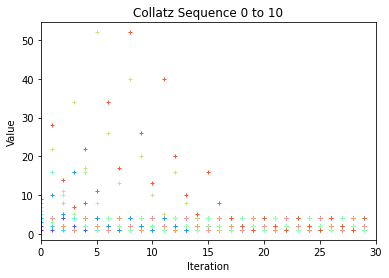

In [ ]:
plot_collatz(10,30)

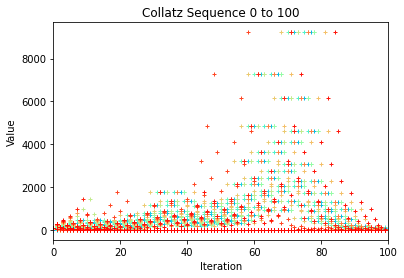

In [ ]:
plot_collatz(100,100)

#Ian's Corner of dropping